 # Black-Hole Binary Formation Channels with Gaussian Mixtures 

Many problems in astrophysics give rise to data with multiple modes. This is typically because different processes physical processes contribute to the observed dataset. 

For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarions include the evolution of isolated binaries in the galactic field and the dynamica assembly of sources in dense environments like globular clusters.


Right now, state-of-the-art analyses seems to say that many channels are all at play. This is a plot by [Zevin et al (2020)](https://arxiv.org/abs/2011.10057)


![Screen%20Shot%202022-01-15%20at%2013.34.38.png](attachment:Screen%20Shot%202022-01-15%20at%2013.34.38.png)

where they consider 5 possibilities for the formation of black hole binaries: common envelop (CE), chemically omogenous stars (CHE), globular clusters (GC), nuclear star clusters (NSC) and stable mass transfer (SMT). 

If you want to know more about LIGO-driven astrophysics and black hole binaries formation channels, these are some recent reviews: [Mandel and Farmer (2021)](https://arxiv.org/abs/1806.05820), [Mapelli (2021)](https://arxiv.org/abs/2106.00699), [Gerosa and Fishbach (2021)](https://arxiv.org/abs/2105.03439).


Anyway. LIGO measures the masses of many black holes. You can find the dataset at `solutions/formationchannels.npy`.


*Hint*: Note that the data provided are of shape (N,1), not (N,). This might be confusing at first, but it's the format that sklearn wants (more on this in a future lecture).  A useful tool to convert between the two is [np.newaxis](https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it).

Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.


### Class labels or "responsibilities"

Class labels are a very interesting by products of a mixture analysis.

What is the probability that a given gravitational-wave event comes from a given channel? This is called "responsiblity" (i.e. which mode is most likely to be responsible for that piece of data). 

$p(j|x_i) = \frac{a_j \mathcal{N(\mu_j,\sigma_j)}}{\sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j)}$


#### At home: derive this using Bayes' rule

In [11]:
pip install --upgrade scikit-learn==0.23.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 12.4 MB/s eta 0:00:00m eta 0:00:010:01:01
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [3455 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers '

            C compiler: gcc -pthread -B /home/ario/anaconda3/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /home/ario/anaconda3/include -fPIC -O2 -isystem /home/ario/anaconda3/include -fPIC
      
            compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/home/ario/anaconda3/include/python3.10 -c'
            gcc: _configtest.c
            _configtest.c:3: warning: ignoring ‘#pragma clang diagnostic’ [-Wunknown-pragmas]
                3 | #pragma clang diagnostic error "-Wattributes"
                  |
            _configtest.c: In function ‘__declspec’:
            _configtest.c:5:24: error: expected declaration specifiers before ‘foo’
                5 | int __declspec(thread) foo;
                  |                        ^~~
            _configtest.c:9:1: error: expected ‘=’, ‘,’, ‘;’, ‘asm’ or ‘__attri

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [2]:
data = np.load('../solutions/formationchannels.npy')

### Look at the data

Text(0, 0.5, 'Data Value')

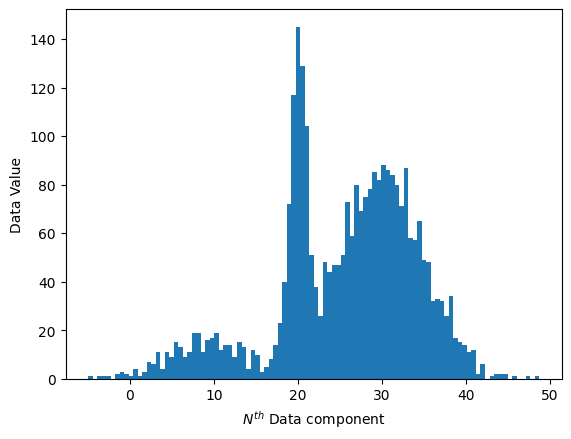

In [6]:
plt.hist(data, bins=100)
plt.xlabel(r'$N^{th}$ Data component')
plt.ylabel('Data Value')

My guess: **3 Gaussian distribution**

## 3-Gaussian fit

In [9]:
data

array([[17.12172682],
       [ 5.94121793],
       [ 6.35914124],
       ...,
       [34.34170191],
       [30.27018478],
       [25.93264098]])

In [13]:
gmix = GaussianMixture(n_components=3, random_state=0).fit(data)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7184db620280>
Traceback (most recent call last):
  File "/home/ario/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ario/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ario/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ario/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [8]:
GaussianMixture?

In [14]:
gmix

GaussianMixture(n_components=3, random_state=0)

In [43]:
x_i = np.array(np.linspace(np.min(data), np.max(data), len(data.flatten())))

wts, mus, sigmas = gmix.weights_.flatten(), gmix.means_.flatten(), np.sqrt(gmix.covariances_.flatten())

In [44]:
mus, sigmas

(array([20.04995136, 30.11583146,  9.09647315]),
 array([1.06150279, 4.91695161, 4.67280693]))

In [45]:
def MixedGaussians(x, loc, scale, weights):
    
    distrib = np.zeros(len(x))
    
    for mu, sigma, pi in zip(loc, scale, weights):
        distrib += pi * norm.pdf(x, loc=mu, scale=sigma)
        
    return distrib

In [47]:
len(data.flatten())
len(x_i)

2950

In [54]:
mixedgaussians = MixedGaussians(x_i, mus, sigmas, wts) 

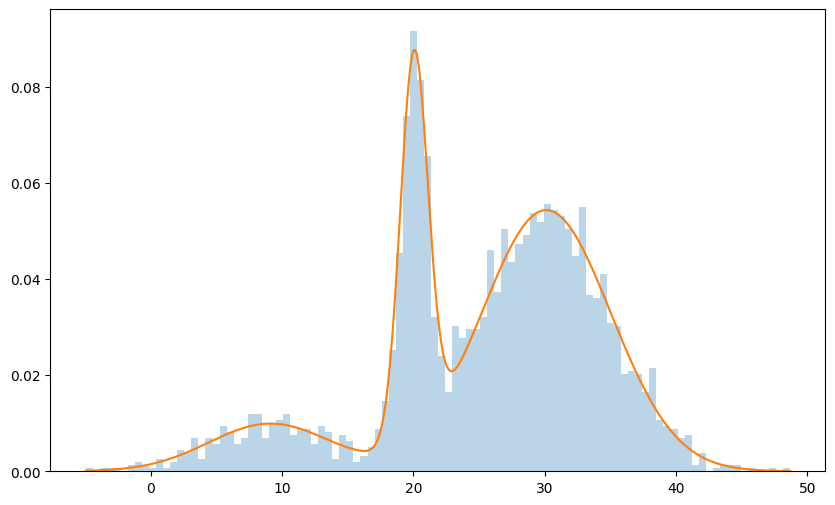

In [56]:
plt.figure(figsize=(10,6))

plt.hist(data, bins=100, density=True, alpha=0.3, label='Data')
plt.plot(x_i, mixedgaussians)

In [51]:
gmix.score?

In [53]:
gmix.score(data)

-3.4011604932916124